### Introduction

This study is conducted based on a dataset including more than 120,000 records. Each record includes information about the passenger and his/her rating about the various attributes about the flight.
<br> The dataset is taken from the resources of mavenanalytics.io and also its origin is from kaggle. Because it is not clearly introduced, I, the author of this project, assumes that each record demonstrates a unique passenger and a unique flight.
<br> In this project, the objectives are to understand the drivers of satisfaction of passengers in US Airline and to create a model to predict the satisfaction of the customers.

### Key take out

- The profile of customer from Economy and Economy Plus are quite similar. They are younger people than Business Class and they travel shorter distance.
- For Business class, it is mostly used for business purpose, unlike Economy and Economy Plus in which the purposes are equally distributed between business and personal.
- People in Business class, in general, have better evaluation on all flight factors, except that they seem to be more impatient as the only lower score they give, in comparison with Economy and Economy Plus, is about Departure and Arrival time convenience.
- As a result, Business Class and Business Purpose are the best predictors for Satisfaction.
- Among the 14 features that people evaluate, Online Boarding, In-flight Wifi Service and On-board Service are the top 3 important factors and In-flight Entertainment, Food and Drink, Ease of Online Booking are the least important attributes.

### Dataset information

As introduced above, this dataset is recommended by mavenanalytics.io and it was posted originally on Kaggle by John D.
https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

For the content, it includes:

- Age: The actual age of the passengers
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

The below attributes are evaluated in scale from 1 (lowest) to 5 (highest) and 0 means "not applicable".

- Ease of Online booking: Satisfaction level of online booking
- Check-in service: Satisfaction level of Check-in service
- Online boarding: Satisfaction level of online boarding
- Gate location: Satisfaction level of Gate location
- On-board service: Satisfaction level of On-board service
- Seat comfort: Satisfaction level of Seat comfort
- Leg room service: Satisfaction level of Leg room service
- Cleanliness: Satisfaction level of Cleanliness
- Food and drink: Satisfaction level of Food and drink
- Inflight service: Satisfaction level of inflight service
- Inflight wifi service: Satisfaction level of the inflight wifi service (0: Not Applicable;1-5)
- Inflight entertainment: Satisfaction level of inflight entertainment
- Baggage handling: Satisfaction level of baggage handling

Lastly, the overall satisfaction is a binary variable. Later, it is going to be used as a dependent variable for the analysis.
- Satisfaction: Overall satisfaction (Satisfied/Neutral or unsatisfied)

### Data cleaning

In [1]:
# Set working directory
import os
dir = os.getcwd() 
os.chdir(dir)

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import plotly.graph_objects as go
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

In [3]:
df = pd.read_csv("data/airline_passenger_satisfaction.csv")

In [4]:
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0  ...                 3             5                 2            5   
1  ...                 5             4                 5            5   
2  ...                 3             5                 3            5   
3  ...                 5             5                 5            4   
4  ...                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied  

[5 rows x 24 columns]

In [5]:
# Check data shape
df.shape

(129880, 24)

In [6]:
# Check names of columns
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [7]:
# Adjust the columns names, replacing spaces and hyphens to avoid potential problem with spaces in variable names
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('-','')

In [8]:
# Check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer_Type                           129880 non-null  object 
 4   Type_of_Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight_Distance                         129880 non-null  int64  
 7   Departure_Delay                         129880 non-null  int64  
 8   Arrival_Delay                           129487 non-null  float64
 9   Departure_and_Arrival_Time_Convenience  129880 non-null  int64  
 10  Ease_of_Online_Booking                  1298

In [9]:
# Check basic statistics of numerical variables
df.describe()

ID            Age  Flight_Distance  Departure_Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival_Delay  Departure_and_Arrival_Time_Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%         0.000000                                2.000000   
50%         0.000000                                3.000000   
75%        13.000000                                4.000000   
max      1584.000000                                5.000000   

       Ease_of_Online_Booking  Checkin_Service  Online_Boarding  \
count           129880.000000    129880.000000    129880.000000   
mean                 2.756876         3.306267         3.252633   
std                  1.401740         1.266185         1.350719   
min                  0.000000         0.000000         0.000000   
25%                  2.000000         3.000000         2.000000   
50%                  3.000000         3.000000         3.000000   
75%                  4.000000         4.000000         4.000000   
max                  5.000000         5.000000         5.000000   

       Gate_Location  Onboard_Service   Seat_Comfort  Leg_Room_Service  \
count  129880.000000    129880.000000  129880.000000     129880.000000   
mean        2.976925         3.383023       3.441361          3.350878   
std         1.278520         1.287099       1.319289          1.316252   
min         0.000000         0.000000       0.000000          0.000000   
25%         2.000000         2.000000       2.000000          2.000000   
50%         3.000000         4.000000       4.000000          4.000000   
75%         4.000000         4.000000       5.000000          4.000000   
max         5.000000         5.000000       5.000000          5.000000   

         Cleanliness  Food_and_Drink  Inflight_Service  Inflight_Wifi_Service  \
count  129880.000000   129880.000000     129880.000000          129880.000000   
mean        3.286326        3.204774          3.642193               2.728696   
std         1.313682        1.329933          1.176669               1.329340   
min         0.000000        0.000000          0.000000               0.000000   
25%         2.000000        2.000000          3.000000               2.000000   
50%         3.000000        3.000000          4.000000               3.000000   
75%         4.000000        4.000000          5.000000               4.000000   
max         5.000000        5.000000          5.000000               5.000000   

       Inflight_Entertainment  Baggage_Handling  
count           129880.000000     129880.000000  
mean                 3.358077          3.632114  
std                  1.334049          1.180025  
min                  0.000000          1.000000  
25%                  2.000000          3.000000  
50%                  4.000000          4.000000  
75%                  4.000000          5.000000  
max                  5.000000          5.000000

- From the table above, it can be seen that the minimum age is 7. For this study, the author keeps all records, yet, it is also possible to focus on people who are 18+. 
- Secondly, the shortest flight distance is 31 miles, this number is relative low for a flight distance, yet, it is not entirely impossible. To clean 'Flight_Distance', the flight duration should be taken into consideration to figure out the unreasonable values. Unfortunately, in this dataset, it lacks of flight duration. So I keep all the records.
- Thirdly, 14 attributes from 'Departure_and_Arrival_Time_Convenience' to 'Baggage_Handling' have 5-point scale. But the minimum is 0, it means 'Not applicable', so they need to be changed to NAs.

In [10]:
# Check NA in dataset
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer_Type                               0
Type_of_Travel                              0
Class                                       0
Flight_Distance                             0
Departure_Delay                             0
Arrival_Delay                             393
Departure_and_Arrival_Time_Convenience      0
Ease_of_Online_Booking                      0
Checkin_Service                             0
Online_Boarding                             0
Gate_Location                               0
Onboard_Service                             0
Seat_Comfort                                0
Leg_Room_Service                            0
Cleanliness                                 0
Food_and_Drink                              0
Inflight_Service                            0
Inflight_Wifi_Service                       0
Inflight_Entertainment            

From the investigations above, there is one issue with 393 null values at Arrival Delay, which should be changed to 0.

In [11]:
# Replace NAs at Arrival Delay with 0
df['Arrival_Delay'].fillna(0,inplace=True)

As mentioned above, 14 attributes from 'Departure_and_Arrival_Time_Convenience' to 'Baggage_Handling' having 5-point scale need adjusting. The 0 in the scale needs to be replaced by NA.

In [12]:
#Replace 0 with NA in the 14 attributes evaluated using 5-point scale
attributes = ['Departure_and_Arrival_Time_Convenience',
'Ease_of_Online_Booking','Checkin_Service',
'Online_Boarding','Gate_Location',
'Onboard_Service','Seat_Comfort',
'Leg_Room_Service',
'Cleanliness',
'Food_and_Drink',
'Inflight_Service',
'Inflight_Wifi_Service',
'Inflight_Entertainment',
'Baggage_Handling']
df[attributes] = df[attributes].replace(0, np.nan)

In [13]:
df.isnull().sum()

ID                                           0
Gender                                       0
Age                                          0
Customer_Type                                0
Type_of_Travel                               0
Class                                        0
Flight_Distance                              0
Departure_Delay                              0
Arrival_Delay                                0
Departure_and_Arrival_Time_Convenience    6681
Ease_of_Online_Booking                    5682
Checkin_Service                              1
Online_Boarding                           3080
Gate_Location                                1
Onboard_Service                              5
Seat_Comfort                                 1
Leg_Room_Service                           598
Cleanliness                                 14
Food_and_Drink                             132
Inflight_Service                             5
Inflight_Wifi_Service                     3916
Inflight_Ente

Now we have many NAs in 13 variables, later before proceeding with fitting the model, those NAs will be imputed.

In [14]:
# Set the 'ID' column as the index
df.set_index('ID', inplace=True)

In [15]:
# Remove duplication if there is any
df = df.drop_duplicates()

In [16]:
# Splitting the DataFrame into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=199)

# Separating features (X) and target (Y) for both train and test sets
X_train = train_df.drop('Satisfaction', axis=1)
y_train = train_df['Satisfaction']
X_test = test_df.drop('Satisfaction', axis=1)
y_test = test_df['Satisfaction']

## Profile

In [17]:
#Function to calculate percentage for pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [18]:
# Function to make ideal pie chart
def make_pie_chart(ax, df, var, title, var_order=None):
    if ax is None: # In case the chart stands alone, not in a grid of charts
        ax = plt.gca() 
    ax.set_title(title, size=20, y=1.5, x=0.5)
    if var_order:
        counts = df[var].value_counts().reindex(var_order)
    else:
        counts = df[var].value_counts()
    ax.pie(counts, labels=counts.index, shadow=True,
           autopct='%1.1f%%', pctdistance=0.5, radius=2, startangle=90)

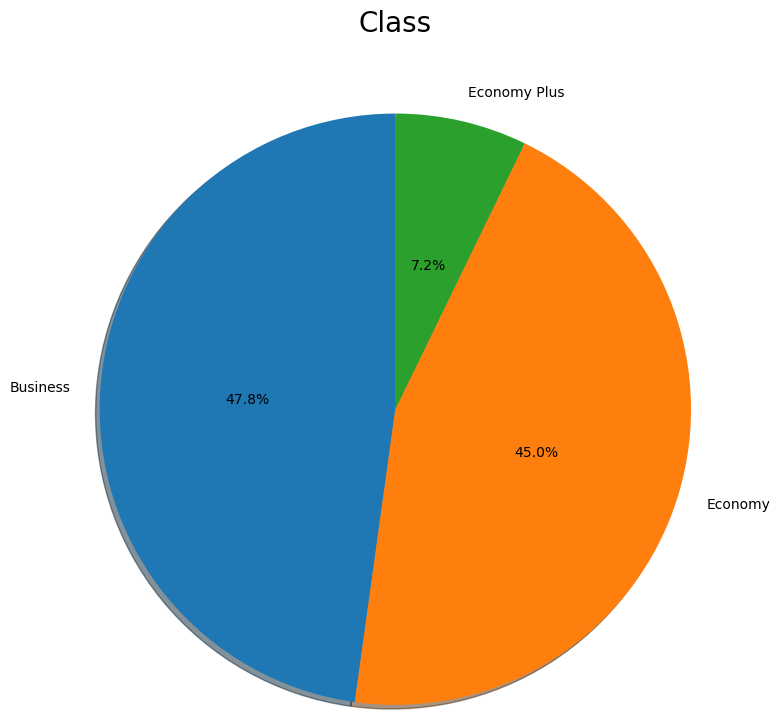

In [19]:
# Pie chart comparing 3 classes
make_pie_chart(ax=None, df=train_df, var='Class', title='Class', var_order=None)

Most of the records in the dataset are about Business and Economy classes, their shares are almost equal to the other. Economy Plus has the smallest share as 7.2%.

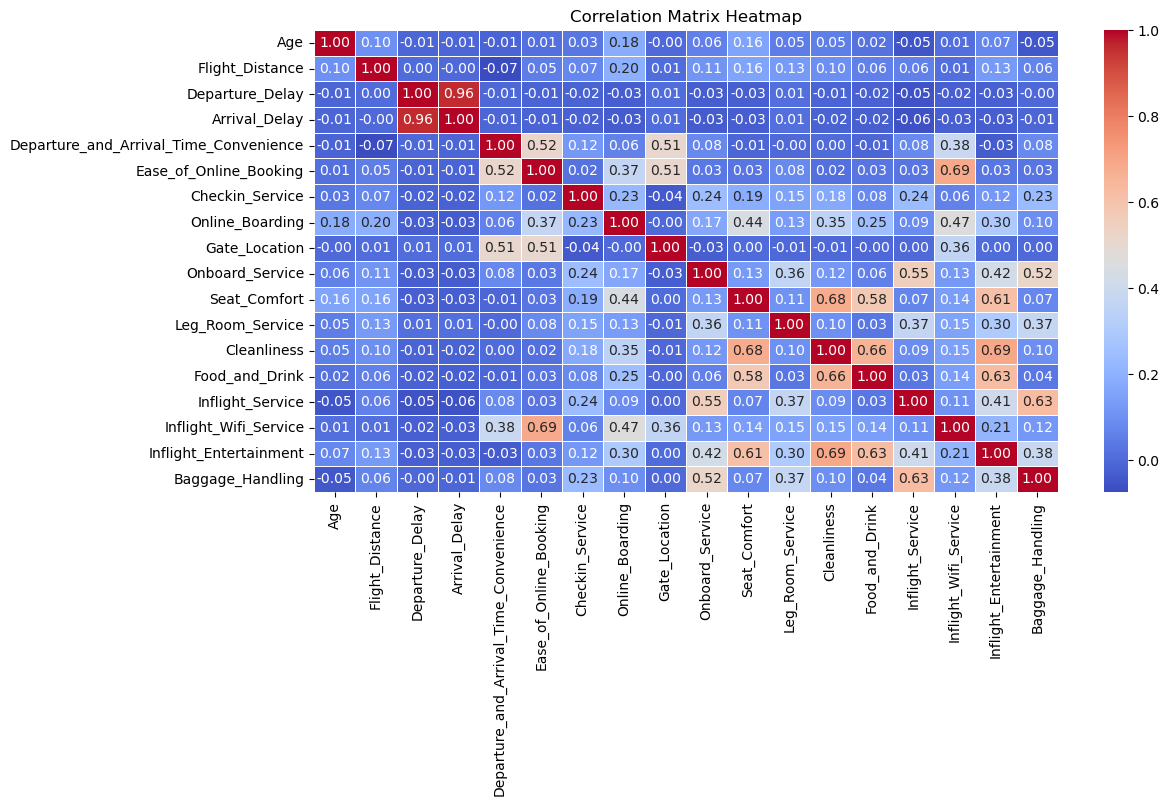

In [20]:
# Correlation matrix heatmap
df_std = df.copy()
numerical_columns = df_std.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df_std[numerical_columns] = scaler.fit_transform(df_std[numerical_columns])

plt.figure(figsize=(12, 6))
sns.heatmap(df_std[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

All of the correlations are lower than 0.7, so there is no high correlation [0.7, 0.9] in the data.

After that, three classes are compared, so the dataset is split into 3 classes.

In [21]:
biz = train_df.query('`Class` == "Business"')
eco = train_df.query('`Class` == "Economy"')
eco_plus = train_df.query('`Class` == "Economy Plus"')

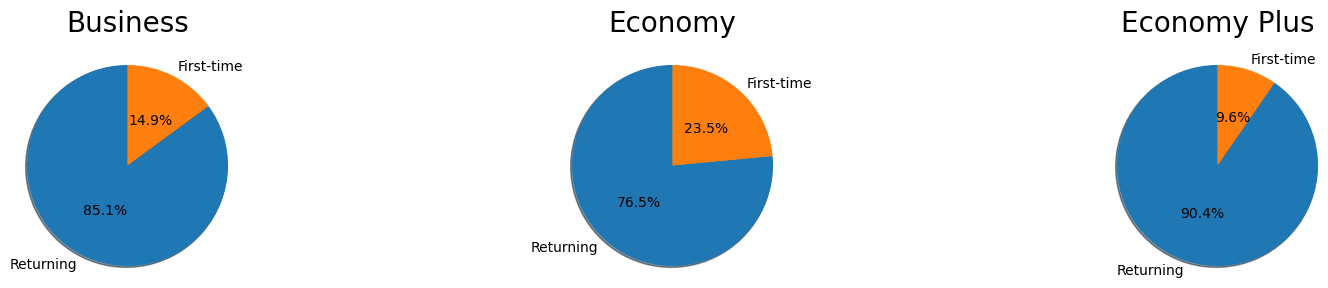

In [22]:
# Create a frame to put 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(16.5, 5))

# Create consistent order for all charts
customer_type_order = ['Returning', 'First-time']

# Create one chart for each class
make_pie_chart(axs[0], biz, 'Customer_Type', 'Business', customer_type_order)
make_pie_chart(axs[1], eco, 'Customer_Type', 'Economy', customer_type_order)
make_pie_chart(axs[2], eco_plus, 'Customer_Type','Economy Plus', customer_type_order)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()

Economy Plus is the smallest class in term of share and it also has the lowest proportion of new customers.
The new triers are likely to choose Economy.

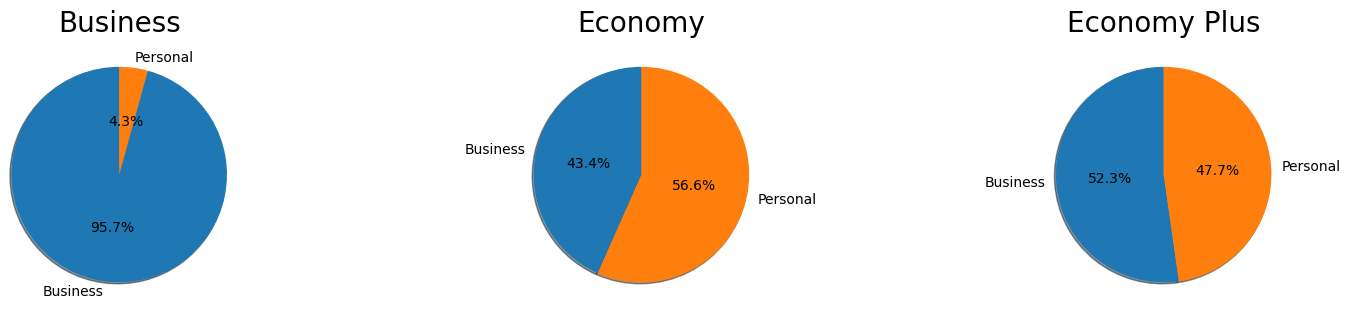

In [23]:
# Create a frame to put 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 

# Create consistent order for all charts
travel_type_order = ['Business', 'Personal']

# Create one chart for each class
make_pie_chart(axs[0], biz, 'Type_of_Travel', 'Business', travel_type_order)
make_pie_chart(axs[1], eco, 'Type_of_Travel', 'Economy', travel_type_order)
make_pie_chart(axs[2], eco_plus, 'Type_of_Travel','Economy Plus', travel_type_order)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()

The more expensive the class, the more likely people choose it for Business purpose. Business class, as its name indicates, are used solely for Business purpose.

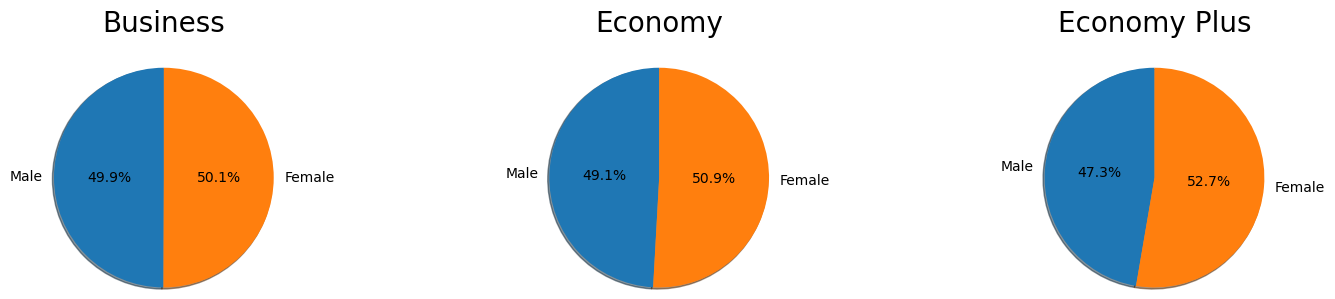

In [24]:
# Create a frame to put 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Create consistent order for all charts
gender_order = ['Male', 'Female']

# Create one chart for each class
make_pie_chart(axs[0], biz, 'Gender', 'Business', gender_order )
make_pie_chart(axs[1], eco, 'Gender', 'Economy', gender_order )
make_pie_chart(axs[2], eco_plus, 'Gender','Economy Plus', gender_order )

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()

There is no difference among gender distribution across classes.

In [25]:
# Function to make ideal box plot
def make_box_plot(ax, df, var, var_range, title):
    ax.set_title(title, size=20, fontweight='bold', y=1.05)
    sns.boxplot(x=var, data=df, ax=ax)
    ax.set_xticks(var_range)
    ax.set_xlabel(var, size=15)

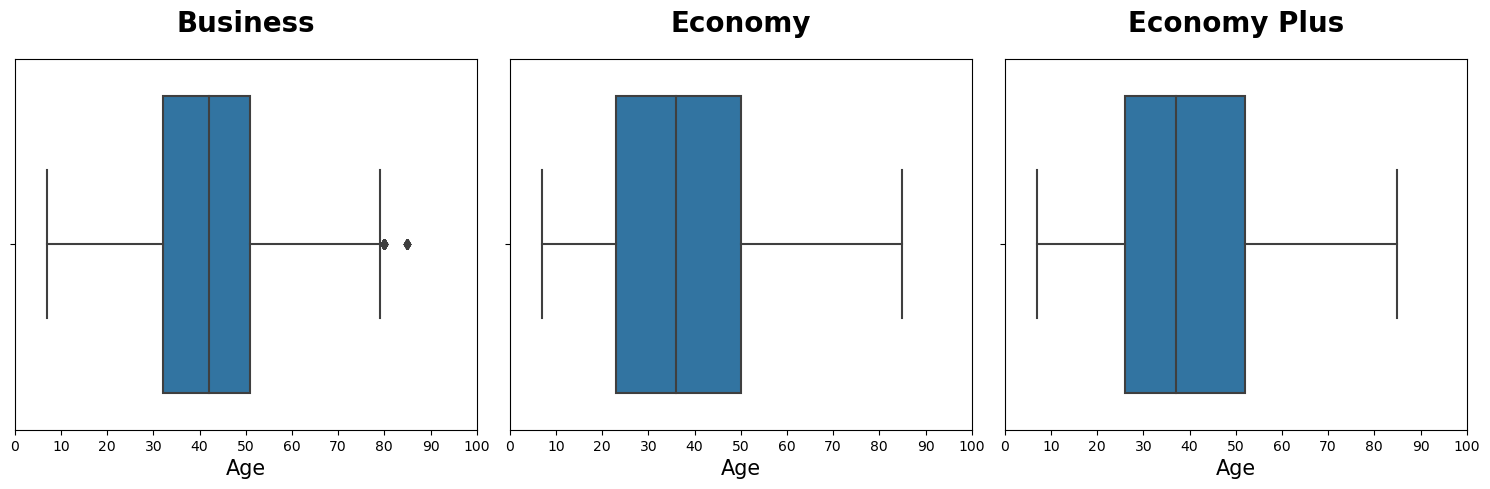

In [26]:
# Create graphs for Age
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
age_range = np.arange(0, 110, 10)
make_box_plot(axs[0], biz, 'Age', age_range, 'Business')
make_box_plot(axs[1], eco, 'Age', age_range, 'Economy')
make_box_plot(axs[2], eco_plus, 'Age', age_range, 'Economy Plus')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

People from Business class are slightly older than people from the other two categories. Between Economy and Economy Plus, the age distribution are almost the same.

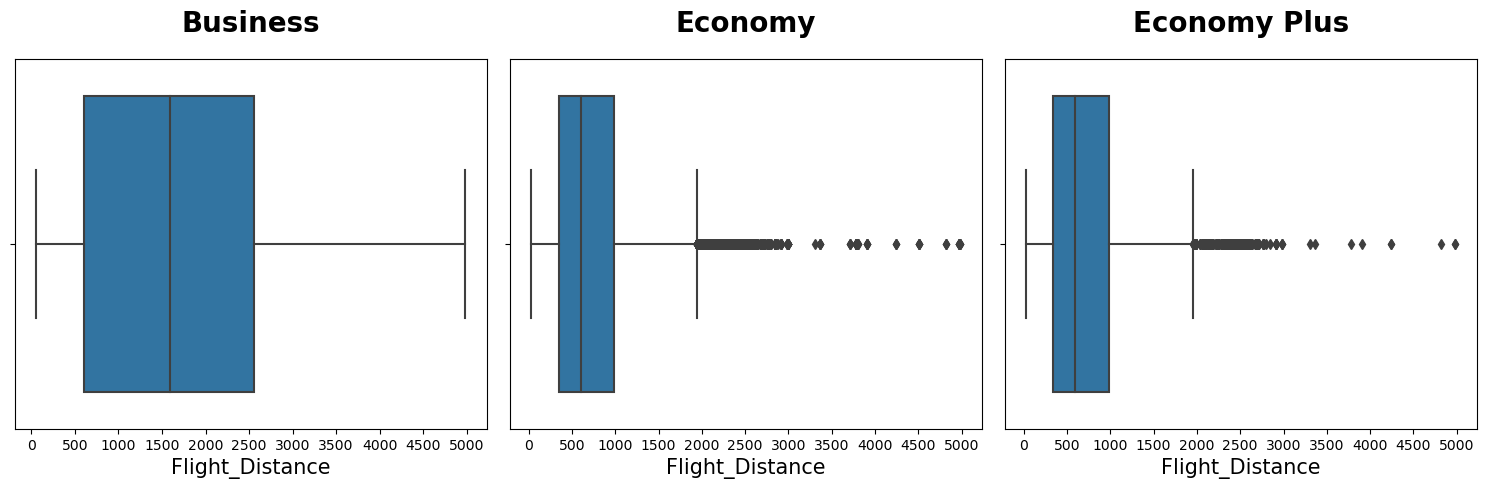

In [27]:
# Create graphs for Flight_Distance
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
distance_range = np.arange(0, 5001, 500)
make_box_plot(axs[0], biz, 'Flight_Distance', distance_range, 'Business')
make_box_plot(axs[1], eco, 'Flight_Distance', distance_range, 'Economy')
make_box_plot(axs[2], eco_plus, 'Flight_Distance', distance_range, 'Economy Plus')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

People in Business class have significant further distance than in Economy or Economy Plus. Their average distance is above 1500 miles while most of the journeys in Economy and Economy Plus are lower than 1000 miles.

## Satisfaction

In this section, I am going to focus on all of the evaluations done on 14 metrics to see if there is difference among the 3 classes.

In [28]:
# Set the labels and calculate the mean values for the radar chart
attribute_labels = ['Departure and Arrival Time Convenience',
'Ease of Online Booking','Check-in Service',
'Online Boarding','Gate Location',
'Onboard Service','Seat Comfort',
'Leg Room Service',
'Cleanliness',
'Food and Drink',
'In-flight Service',
'In-flight Wifi Service',
'In-flight Entertainment',
'Baggage Handling']

satisfaction = df[attributes+['Class']]

mean_values = satisfaction.groupby('Class').mean()

In [29]:
# Create the radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=list(mean_values.loc['Business',]),
      theta=attribute_labels,
      fill='toself',
      name='Business'
))
fig.add_trace(go.Scatterpolar(
      r=list(mean_values.loc['Economy',]),
      theta=attribute_labels,
      fill='toself',
      name='Economy'
))
fig.add_trace(go.Scatterpolar(
      r=list(mean_values.loc['Economy Plus',]),
      theta=attribute_labels,
      fill='toself',
      name='Economy Plus'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()



Similar to the profile, there are similar pattern of evaluation between Economy and Economy Plus. Their evaluation are fluctuating around 3 points across metrics. Comparing to Business class, their satisfaction is lower in most of the attributes. Yet, people from all class have the same feeling about the Gate Location and In-flight Wifi Service. Interestingly, people in Business class are more disappointed about the Departure and Arrival Time Convenience.

## Logistic regression

In this section, I am going to create a logistic regression model to predict to predict if the customers are satisfied with the trips based on their profile and their evaluation of the trip components.
<br> Firstly, I need to pre-proceed the predictors, my actions include:
- Impute missing values
- Standardize each variable
- Encode the categorical variables to fit the model

In [30]:
def transform(df):
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=np.number).columns
    
    # Check for missing values
    missing_values = df.isnull().sum()

    # Handle missing values (if necessary)
    if missing_values.any():
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        df[numerical_columns] = imp.fit_transform(df[numerical_columns])

    # Standardize numerical features
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # One-hot encode categorical features
    df = pd.get_dummies(df)
    return df

In [31]:
# Pre-proceed the train and test predictors
X_train = transform(X_train)
X_test = transform(X_test)

It is also necessary to check the balance of the dependent variable.

In [32]:
# Check balance of dependent variable
y_train.value_counts()

Satisfaction
Neutral or Dissatisfied    58733
Satisfied                  45171
Name: count, dtype: int64

Currently, it is mildly imbalance, so oversampling method will be executed.

In [33]:
# Oversampling to balance the dependent variable
smote = SMOTE(random_state=199)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

After all the pre-processing is done, I start to fit the model, and predict the test data.

In [34]:
# Initiate the model
logreg = LogisticRegression(random_state=199, max_iter = 1000)

# Fit the model with data
logreg.fit(X_train_oversampled, y_train_oversampled)

# Predict the test
y_pred = logreg.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

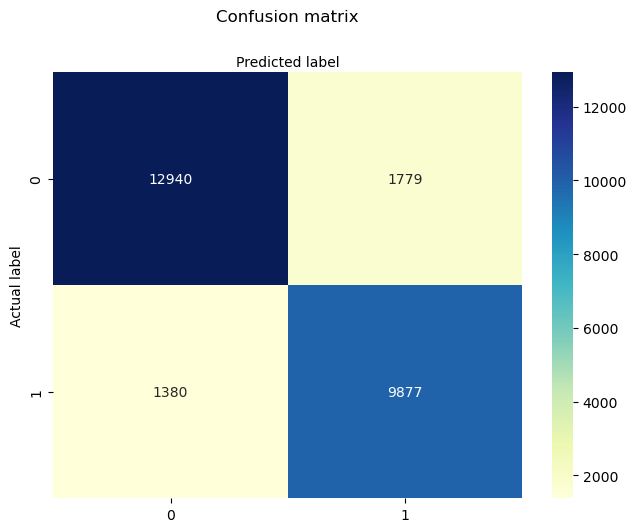

In [35]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.90      0.88      0.89     14719
              Satisfied       0.85      0.88      0.86     11257

               accuracy                           0.88     25976
              macro avg       0.88      0.88      0.88     25976
           weighted avg       0.88      0.88      0.88     25976



Looking at the confusion Matrix
<br> Misclassifications are fairly balanced between the two classes, although slightly more instances of "Neutral or Dissatisfied" are misclassified as "Satisfied" compared to the other way around.
<br> For the Classification.
<br> The model performs well overall, with high precision, recall, and F1-score for both classes.
<br> The accuracy of 88% indicates that the model is effective in distinguishing between "Neutral or Dissatisfied" and "Satisfied" instances.
<br> The class imbalance (more instances of "Neutral or Dissatisfied" than "Satisfied") does not seem to significantly affect the model's performance.


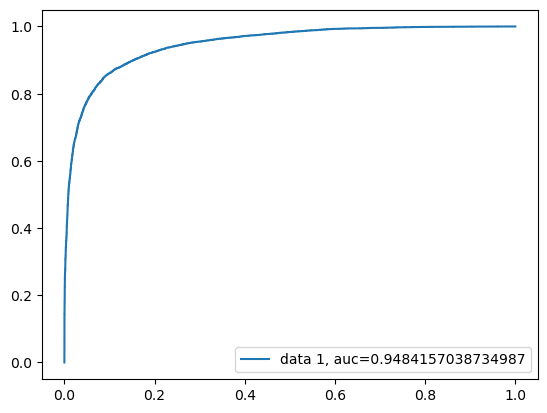

In [37]:
# Get the column index of positive class
positive_class_index = list(logreg.classes_).index('Satisfied')

# Select the probabilities associated with the positive class
y_pred_proba = logreg.predict_proba(X_test)[:, positive_class_index]

# Label the positive class
positive_class_label = 'Satisfied'

# Convert y_true to binary labels
y_true_binary = (y_test == positive_class_label).astype(int)

# Calculate ROC curve
fpr, tpr, _ = metrics.roc_curve(y_true_binary, y_pred_proba)

# Calculate AUC
auc = metrics.roc_auc_score(y_true_binary, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

Regarding the ROC, with an AUC of 0.948, it indicates that the model is performing well in terms of distinguishing between the classes, with strong discriminatory power.

Last but not least, I am going to check the importance of the variables using permutation method.

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

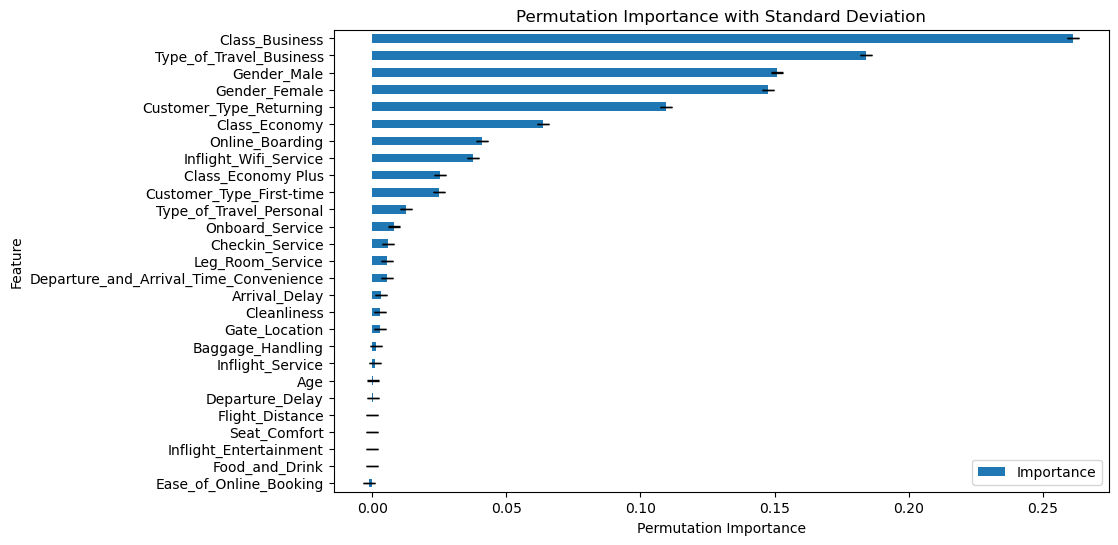

In [38]:
# Check the importance of the variables using permutation method
result = permutation_importance(logreg, X_test, y_test, n_repeats=10, random_state=199)


feature_importance = pd.DataFrame({'Feature': X_test.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

From the graph, it can be seen that the top important variables are the ones about the profile of the customers, such as class, type of travel, gender, customer type. This insight is helpful to predict the satisfaction based on who evaluate the journey. In other words, it is helpful for segment targeting problem.
<br> However, what the airline can improve is the 14 attributes that people evaluate. Among those 14 attributes, Online Boarding, In-flight Wifi Service and On-board Service are the most important factors that lead to customers' satisfaction.
<br> And the least important factors are In-flight Entertainment, Food and Drink, and Ease of Online Booking.